In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import (Descriptors,
    Lipinski, QED, Draw, AllChem)
from kinfraglib import utils
import matplotlib.pyplot as plt
import seaborn as sns
import utils_eval


Read molecules to dataframe

In [2]:
# read data
data = utils_eval.read_mols('../results_5l4q_rerun/5l4q/results.sdf')
data['inchi'] = data.apply(lambda x: Chem.MolToInchi(utils.standardize_mol(x.ROMol)), axis=1)
data['has_no_chiral_centre'] = data.apply(lambda x: len(Chem.FindMolChiralCenters(utils.standardize_mol(x.ROMol), includeUnassigned=True, useLegacyImplementation=False)) == 0, axis=1)
data['binding_affinity'] = data.apply(lambda x: (x['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_UPPER_BOUNDARY [nM]'] + x['BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM]'])/2, axis=1)
data.head()

,ROMol,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_UPPER_BOUNDARY [nM],BIOSOLVEIT.LOGP,BIOSOLVEIT.MOLECULAR_WEIGHT,BIOSOLVEIT.TPSA,fragment_ids,smiles_ligand,smiles_fragments_dummy,smiles_fragments,BIOSOLVEIT.DOCKING_SCORE,filtered,num_fragments,inchi,has_no_chiral_centre,binding_affinity
0,"<img data-content=""rdkit/molecule"" src=""data:i...",0.056344,5.598103,1.78280,326.465,54.28,"{'AP': 288, 'SE': 63}",C[NH+]1CCC(c2ccc(NCCCNc3ccccn3)nc2)CC1,"{'AP': 'CCCNc1ccccn1', 'SE': '[54*]Nc1ccc(C2CC...","{'AP': '[6*]c1ccnc(NCCC[59*])c1', 'SE': 'C[NH+...",429.86,1,2,InChI=1S/C19H27N5/c1-24-13-8-16(9-14-24)17-6-7...,True,2.827224
1,"<img data-content=""rdkit/molecule"" src=""data:i...",0.131869,13.102000,0.61940,324.406,75.11,"{'AP': 133, 'SE': 285}",CNC(=O)C[NH+]1CCC(c2cnc3[nH]c4cnccc4c3c2)CC1,"{'AP': 'c1cnc2[nH]c3cnccc3c2c1', 'SE': '[27*]C...","{'AP': '[1*]c1cc2c(cn1)[nH]c1ncc([21*])cc12', ...",-29.47,1,2,InChI=1S/C18H21N5O/c1-19-17(24)11-23-6-3-12(4-...,True,6.616935
2,"<img data-content=""rdkit/molecule"" src=""data:i...",0.153319,15.233179,0.22440,324.430,74.65,"{'AP': 410, 'SE': 352}",CC(c1ccnc(Nc2ccc3cc[nH]c3n2)c1)[NH+]1CC[NH2+]CC1,"{'AP': 'Nc1ccc2cc[nH]c2n1', 'SE': '[6*]N1CC[NH...","{'AP': '[30*]Nc1cc([46*])c2cc[nH]c2n1', 'SE': ...",-21.60,1,2,InChI=1S/C18H22N6/c1-13(24-10-8-19-9-11-24)15-...,False,7.693249
3,"<img data-content=""rdkit/molecule"" src=""data:i...",0.202910,20.160317,1.20200,352.436,76.34,"{'AP': 289, 'SE': 64}",COc1cc2nccc(O)c2cc1-c1ccc(N2CC[NH2+]CC2C)c[nH+]1,"{'AP': 'COc1ccc2c(O)ccnc2c1', 'SE': '[29*]c1cc...","{'AP': '[19*]c1cc2c(O[25*])ccnc2cc1OC', 'SE': ...",356.53,1,2,InChI=1S/C20H22N4O2/c1-13-11-21-7-8-24(13)14-3...,False,10.181613
4,"<img data-content=""rdkit/molecule"" src=""data:i...",0.210052,20.869897,2.74282,340.404,94.92,"{'AP': 133, 'SE': 10}",Cc1nc(C(C)(O)CO)sc1-c1cnc2[nH]c3cnccc3c2c1,"{'AP': 'c1cnc2[nH]c3cnccc3c2c1', 'SE': '[5*]c1...","{'AP': '[1*]c1cc2c(cn1)[nH]c1ncc([21*])cc12', ...",-24.89,1,2,"InChI=1S/C17H16N4O2S/c1-9-14(24-16(20-9)17(2,2...",False,10.539975


In [3]:
print(f"Compounds with no chiral centre: {sum(data['has_no_chiral_centre'])}")

Compounds with no chiral centre: 59852


In [4]:
data_without_chrial_centre = data[data['has_no_chiral_centre']].reset_index(drop=True)
data_without_chrial_centre

,ROMol,BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_LOWER_BOUNDARY [nM],BIOSOLVEIT.HYDE_ESTIMATED_AFFINITY_UPPER_BOUNDARY [nM],BIOSOLVEIT.LOGP,BIOSOLVEIT.MOLECULAR_WEIGHT,BIOSOLVEIT.TPSA,fragment_ids,smiles_ligand,smiles_fragments_dummy,smiles_fragments,BIOSOLVEIT.DOCKING_SCORE,filtered,num_fragments,inchi,has_no_chiral_centre,binding_affinity
0,"<img data-content=""rdkit/molecule"" src=""data:i...",5.634400e-02,5.598103e+00,1.78280,326.465,54.28,"{'AP': 288, 'SE': 63}",C[NH+]1CCC(c2ccc(NCCCNc3ccccn3)nc2)CC1,"{'AP': 'CCCNc1ccccn1', 'SE': '[54*]Nc1ccc(C2CC...","{'AP': '[6*]c1ccnc(NCCC[59*])c1', 'SE': 'C[NH+...",429.86,1,2,InChI=1S/C19H27N5/c1-24-13-8-16(9-14-24)17-6-7...,True,2.827224e+00
1,"<img data-content=""rdkit/molecule"" src=""data:i...",1.318690e-01,1.310200e+01,0.61940,324.406,75.11,"{'AP': 133, 'SE': 285}",CNC(=O)C[NH+]1CCC(c2cnc3[nH]c4cnccc4c3c2)CC1,"{'AP': 'c1cnc2[nH]c3cnccc3c2c1', 'SE': '[27*]C...","{'AP': '[1*]c1cc2c(cn1)[nH]c1ncc([21*])cc12', ...",-29.47,1,2,InChI=1S/C18H21N5O/c1-19-17(24)11-23-6-3-12(4-...,True,6.616935e+00
2,"<img data-content=""rdkit/molecule"" src=""data:i...",2.360840e-01,2.345631e+01,4.80080,384.437,64.96,"{'AP': 133, 'SE': 143}",COc1ccc(OC)c(-c2cc(-c3cnc4[nH]c5cnccc5c4c3)n(C...,"{'AP': 'c1cnc2[nH]c3cnccc3c2c1', 'SE': '[30*]c...","{'AP': '[1*]c1cc2c(cn1)[nH]c1ncc([21*])cc12', ...",-24.29,1,2,InChI=1S/C23H20N4O2/c1-27-13-15(18-10-16(28-2)...,True,1.184620e+01
3,"<img data-content=""rdkit/molecule"" src=""data:i...",2.486100e-01,2.470089e+01,1.97450,374.470,74.17,"{'AP': 133, 'SE': 56}",CC[NH+]1CCN(c2ccc(Nc3cnc4[nH]c5cnccc5c4c3)nc2)CC1,"{'AP': 'c1cnc2[nH]c3cnccc3c2c1', 'SE': '*Nc1cc...","{'AP': '[1*]c1cc2c(cn1)[nH]c1ncc([21*])cc12', ...",-27.23,1,2,InChI=1S/C21H23N7/c1-2-27-7-9-28(10-8-27)16-3-...,True,1.247475e+01
4,"<img data-content=""rdkit/molecule"" src=""data:i...",2.687390e-01,2.670076e+01,0.55980,428.537,93.80,"{'AP': 143, 'SE': 252}",C[NH+]1CC[NH+](Cc2ccc3c(-c4cnc(N)c(-c5ccccc5)c...,"{'AP': 'Nc1ncccc1-c1ccccc1', 'SE': '[7*]c1nn([...","{'AP': '[3*]c1ccc(-c2cc([15*])cnc2N)cc1', 'SE'...",-11.23,1,2,InChI=1S/C25H26N6O/c1-30-9-11-31(12-10-30)16-1...,True,1.348475e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59847,"<img data-content=""rdkit/molecule"" src=""data:i...",1.238713e+12,1.230734e+14,4.39770,439.876,91.93,"{'AP': 36, 'SE': 220, 'FP': 259}",CNC(=O)c1c(F)cccc1-c1c(Cl)cnc2[nH]c(NCc3ccc(OC...,"{'AP': '[14*]c1c(Cl)cnc2nc([24*])[nH]c12', 'SE...","{'AP': 'Clc1cnc2nc[nH]c2c1', 'SE': '[8*]NCc1cc...",15818.41,1,3,InChI=1S/C22H19ClFN5O2/c1-25-21(30)18-14(4-3-5...,True,6.215608e+13
59848,"<img data-content=""rdkit/molecule"" src=""data:i...",2.616350e+12,2.599498e+14,3.68732,531.041,126.22,"{'AP': 400, 'SE': 56, 'FP': 5}",CC[NH+]1CCN(c2ccc(Nc3cnc(N)c4oc(-c5ccccc5-c5nn...,"{'AP': '[21*]c1cnc(N)c2oc([36*])c(Cl)c12', 'SE...","{'AP': 'Nc1nccc2c(Cl)coc12', 'SE': '*Nc1ccc(N2...",4249.46,1,3,InChI=1S/C27H28ClN9O/c1-3-36-10-12-37(13-11-36...,True,1.312831e+14
59849,"<img data-content=""rdkit/molecule"" src=""data:i...",2.743891e+12,2.726218e+14,3.86642,582.625,149.69,"{'AP': 134, 'SE': 96, 'FP': 355}",Cc1c(C(=O)[O-])cccc1-c1cc(-c2n[nH]c3ccc(Cc4nnc...,{'AP': '[4*]c1cc(-c2n[nH]c3ccc([9*])cc23)ncn1'...,"{'AP': 'c1ccc2c(-c3ccncn3)n[nH]c2c1', 'SE': '[...",1572.83,1,3,InChI=1S/C31H21N9O2S/c1-16-19(6-4-7-20(16)30(4...,True,1.376828e+14
59850,"<img data-content=""rdkit/molecule"" src=""data:i...",3.019517e+12,3.000068e+14,6.13520,611.694,117.42,"{'AP': 401, 'SE': 379, 'FP': 60}",O=c1c2c(F)cccc2ccn1-c1cccc(-c2nc(Nc3ccc(S(=O)(...,"{'AP': '[33*]c1nc(N[43*])ncc1C1CC1', 'SE': 'O=...","{'AP': 'Nc1ncc(C2CC2)cn1', 'SE': '[21*]c1ccc(S...",9572.12,1,3,InChI=1S/C33H30FN5O4S/c34-28-7-3-5-22-15-18-39...,True,1.515132e+14


## Number of generated compounds

In [5]:
print(f"Total number of compounds: {data.index.size}")
print(f"Post-filter --->")
data_post_filtered = data[data['binding_affinity'] <= 1000].copy() 
print(f"Number of compounds with binidng affinity higher than or equal 1000 nM: {data_post_filtered.index.size}")
for unique_val in pd.unique(data_post_filtered['num_fragments']):
    print(f"Number of ligands comprising {unique_val} fragments: {sum(x == unique_val for x in data_post_filtered['num_fragments'])}")

print(f'Number of compounds with bindinda affinity less than 100nM: {sum(data["binding_affinity"] < 100)}')

Total number of compounds: 81848
Post-filter --->
Number of compounds with binidng affinity higher than or equal 1000 nM: 18158
Number of ligands comprising 2 fragments: 1441
Number of ligands comprising 3 fragments: 16717
Number of compounds with bindinda affinity less than 100nM: 7103


In [37]:
print(f'Removed {100-data_post_filtered.index.size/data.index.size * 100} compounds (noise)')

Removed 83.58315066058415 compounds (noise)


In [38]:
data_post_filtered = data_post_filtered.sort_values(['binding_affinity']).reset_index(drop=True)

In [39]:
with Chem.SDWriter('../results_5n1f_25_02/top15.sdf') as w:
  for m in data_post_filtered.ROMol[:15]:
    w.write(m)

## Molecular properties

### Affinity

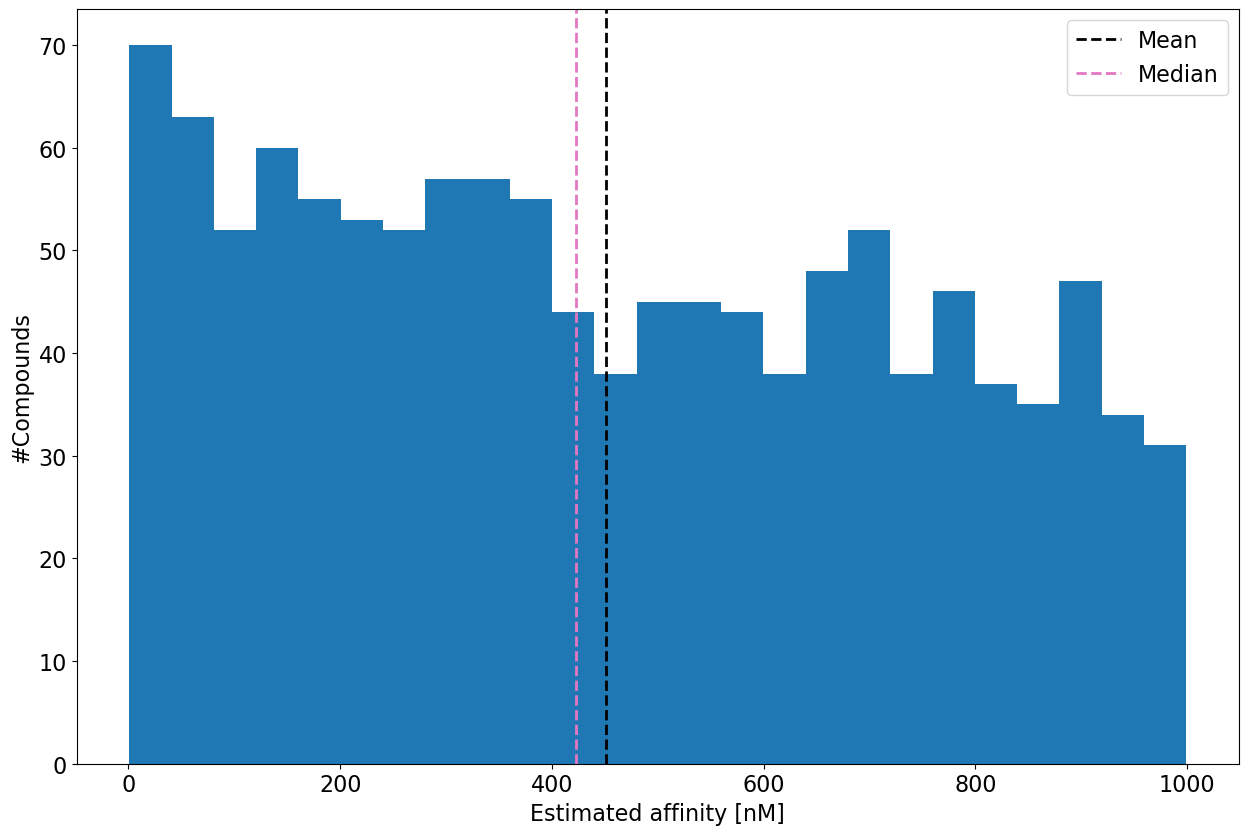

In [49]:
plt.figure(figsize=(15, 9.8))
plt.hist(data_post_filtered.binding_affinity, bins=25)
plt.ylabel("#Compounds", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Estimated affinity [nM]', fontsize=16)
mean_line = plt.axvline(data_post_filtered.binding_affinity.mean(), color='k', linestyle='dashed', linewidth=2, label="Mean")
median_line = plt.axvline(data_post_filtered.binding_affinity.median(), color='tab:pink', linestyle='dashed', linewidth=2, label="Median")
plt.legend(handles = [mean_line, median_line], fontsize=16)

In [32]:
print(f"Statistics of binding affinity (post-filtered): \n{data_post_filtered['binding_affinity'].describe()}")
print(f"Estimated binding affinity [nM] median: {data_post_filtered['binding_affinity'].median()}")

Statistics of binding affinity (post-filtered): 
count    1196.000000
mean      451.256350
std       287.090407
min         0.825466
25%       199.976946
50%       422.360943
75%       694.757447
max       999.017321
Name: binding_affinity, dtype: float64
Estimated binding affinity [nM] median: 422.360943


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

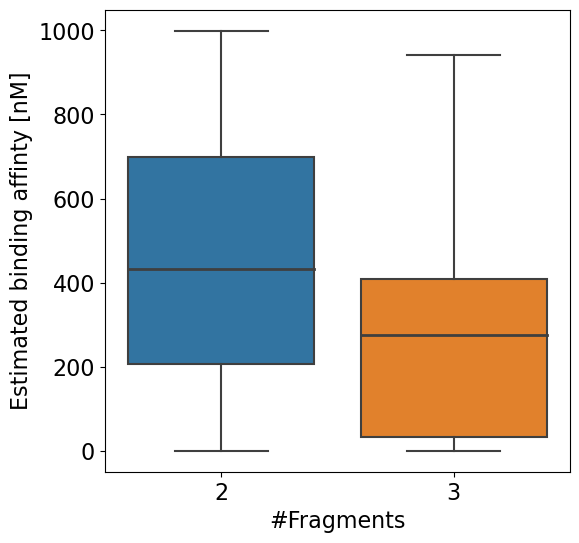

In [33]:
# binding affinity per subpocket
plt.figure(figsize=(6, 6))

bp = sns.boxplot(
x="num_fragments",
y='binding_affinity',
data=data_post_filtered,
medianprops={"linewidth": 2, "linestyle": "-"},
)
plt.ylabel("Estimated binding affinty [nM]", fontsize=16)
plt.xlabel("#Fragments", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

IndexError: index 2 is out of bounds for axis 0 with size 2

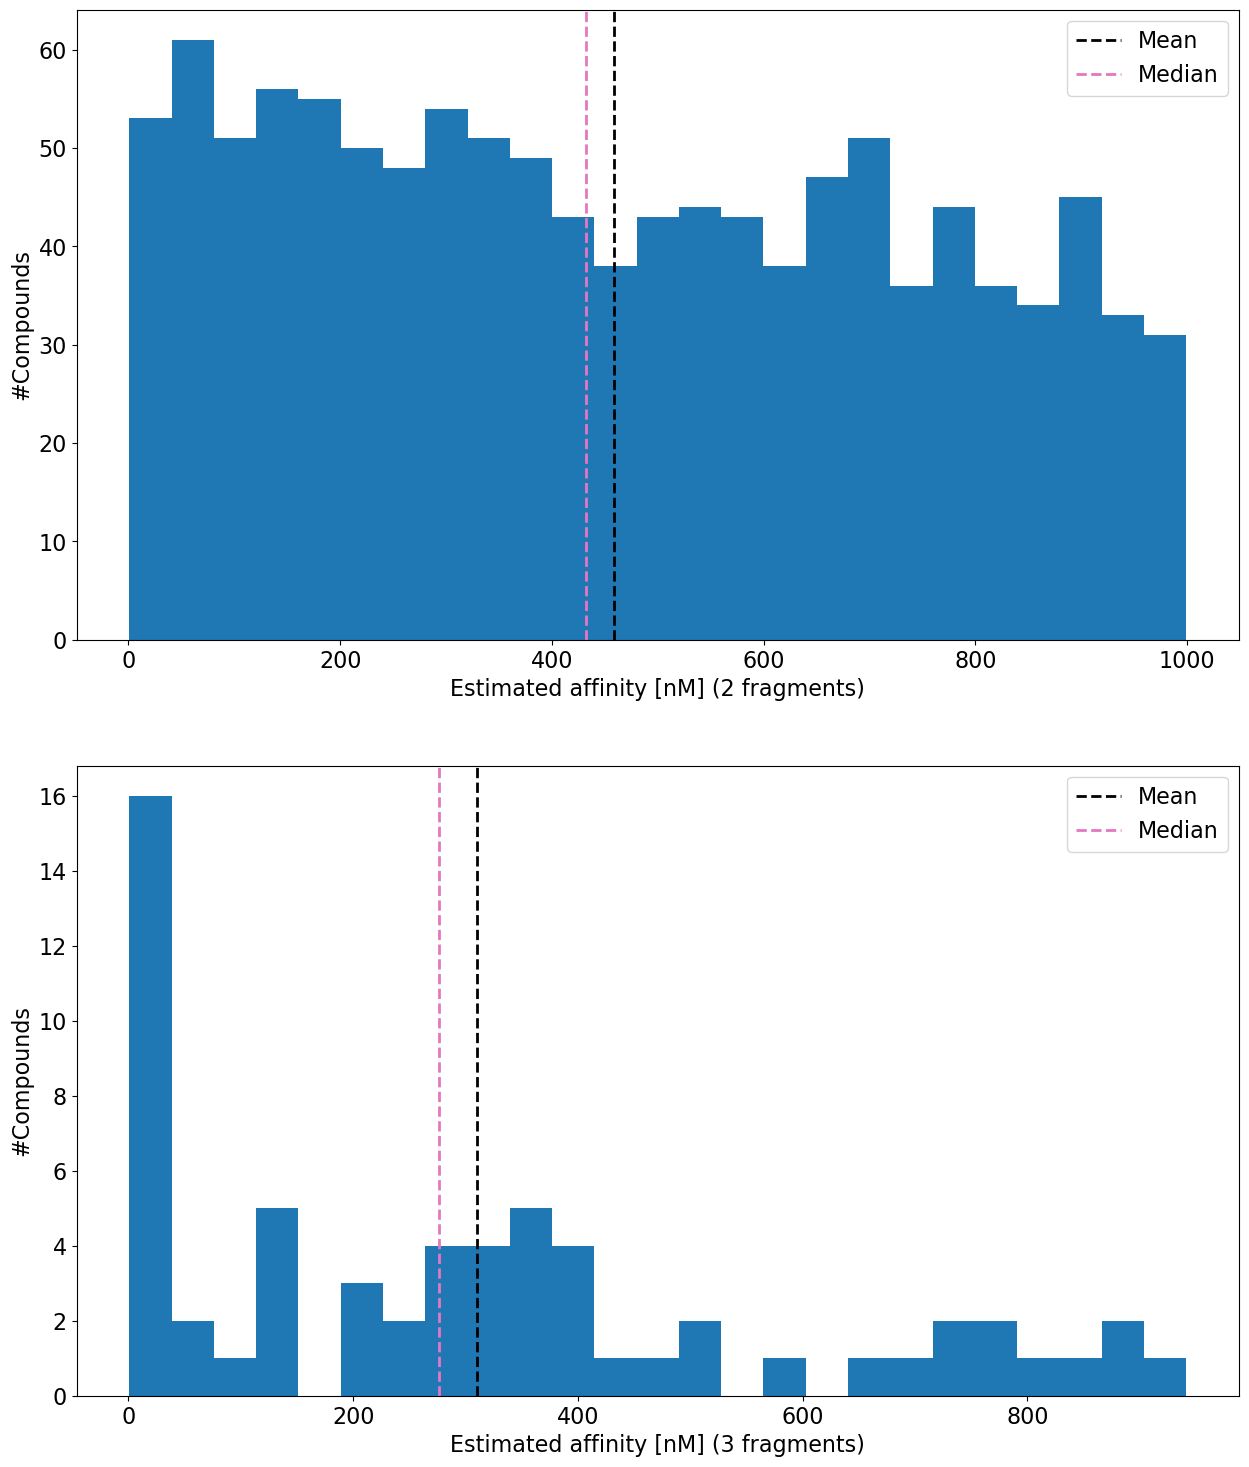

In [34]:
plt.rc('font', size=16) 
fig, axis = plt.subplots(2, 1, figsize=(15, 18))
descriptors = range(2, 5)
for i, descriptor_name in enumerate(descriptors):
        x = data_post_filtered[data_post_filtered.num_fragments == descriptor_name].binding_affinity
        axis[i].hist(x, bins=25)
        axis[i].set(ylabel="#Compounds", xlabel=f"Estimated affinity [nM] ({descriptor_name} fragments)")
        median_line = axis[i].axvline(x.median(), color='tab:pink', linestyle='dashed', linewidth=2, label="Median")
        line = axis[i].axvline(x.mean(), color='k', linestyle='dashed', linewidth=2, label = f"Mean")
        axis[i].legend(handles = [line, median_line], fontsize=16)

In [ ]:
for descriptor_name in range(2, 5):
    x = data_post_filtered[data_post_filtered.num_fragments == descriptor_name].binding_affinity
    print(f"Median: {x.median()}")
    print(f'Binding Affinity stats. of compounds with {descriptor_name} fragments:\n{x.describe()}')

Median: 432.29189775000003
Binding Affinity stats. of compounds with 2 fragments:
count    1134.000000
mean      458.956885
std       285.551095
min         0.825466
25%       206.557464
50%       432.291898
75%       698.858789
max       999.017321
Name: binding_affinity, dtype: float64
Median: 276.828431
Binding Affinity stats. of compounds with 3 fragments:
count     62.000000
mean     310.411088
std      280.854774
min        0.853035
25%       32.383662
50%      276.828431
75%      409.621195
max      941.466217
Name: binding_affinity, dtype: float64
Median: nan
Binding Affinity stats. of compounds with 4 fragments:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: binding_affinity, dtype: float64


### Ro5 and Vebers properties

In [ ]:
# HBD & HBA
data_post_filtered['HBD'] = data_post_filtered['ROMol'].apply(Lipinski.NumHDonors)
data_post_filtered['HBA'] = data_post_filtered['ROMol'].apply(Lipinski.NumHAcceptors)
# molecular weight
data_post_filtered['MW'] = data_post_filtered['ROMol'].apply(Descriptors.ExactMolWt)
#logP
data_post_filtered['logP'] = data_post_filtered['ROMol'].apply(Descriptors.MolLogP)
#rename tpsa
data_post_filtered['RB'] = data_post_filtered['ROMol'].apply(Descriptors.NumRotatableBonds)
data_post_filtered.rename(columns={'BIOSOLVEIT.TPSA': 'TPSA'}, inplace=True)

In [ ]:
data_post_filtered.HBD.unique()

array([2, 1, 3, 4, 0, 6])

In [ ]:
# rule of five fullfilled
data_post_filtered['Ro5'] = data_post_filtered.apply(lambda x: x.HBD <= 5 and x.HBA <= 10 and x.MW <= 500 and x.logP <= 5, axis=1)

# rule of five fullfilled
data_post_filtered['Veber'] = data_post_filtered.apply(lambda x: x.Ro5 and x.TPSA <= 140 and x.RB <= 5, axis=1)

# calculate QED
data_post_filtered['QED'] = data_post_filtered.apply(lambda x: QED.qed(x.ROMol), axis=1)

Text(0.5, 0, 'Has no chiral center')

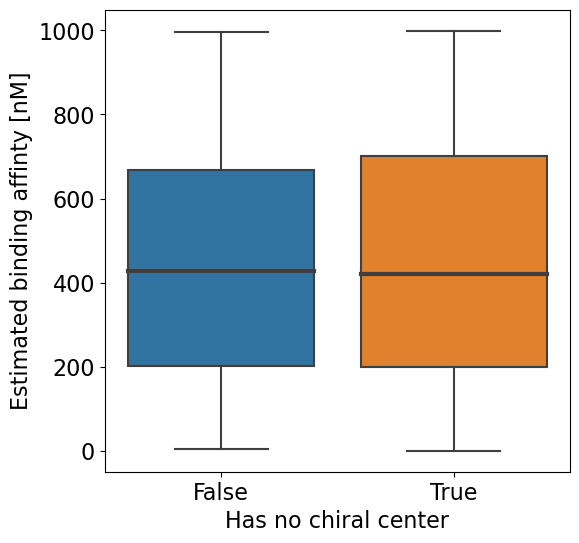

In [ ]:
# binding affinity per subpocket
plt.figure(figsize=(6, 6))

sns.boxplot(
x="has_no_chiral_centre",
y='binding_affinity',
data=data_post_filtered,
medianprops={"linewidth": 2, "linestyle": "-"}
)
plt.ylabel("Estimated binding affinty [nM]", fontsize=16)
plt.xlabel("Has no chiral center", fontsize=16)

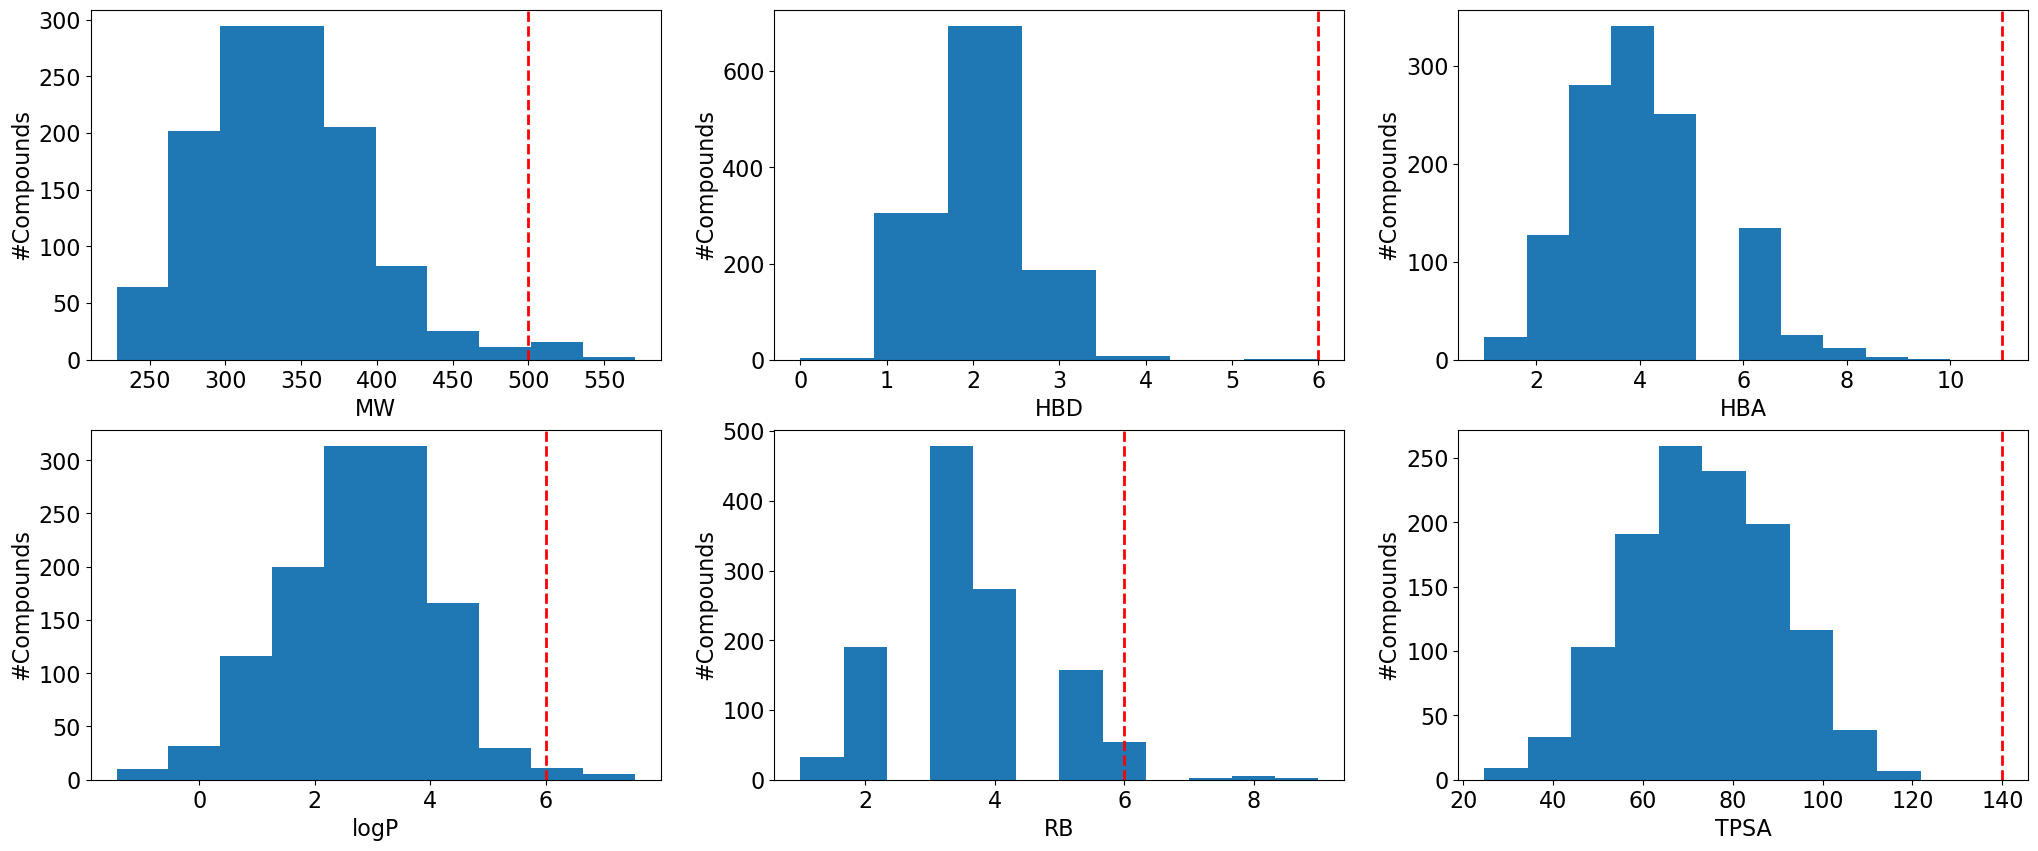

In [ ]:
# plot Ro5 properties on reduced data
#plt.figure(figsize=(50, 6))
plt.rc('font', size=16) 
fig, axis = plt.subplots(2, 2)
fig.set_size_inches(25, 10)
descriptors = ['MW', 'HBD', 'HBA', 'logP', 'RB', 'TPSA']
_temp = ['g/mol', '', '', '', '', 'Å']
benchmarks = [500, 6, 11, 6, 6, 140]
labels = [500, 5, 10, 5, 5, 140]
for i, descriptor_name in enumerate(descriptors):
        if descriptor_name == 'HBD':
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name], bins=7)
        elif  descriptor_name == 'HBA': 
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name], bins=11)
        elif  descriptor_name == 'RB': 
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name], bins=12)
        else:
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name])
        axis[i // 2, i % 2].set(ylabel="#Compounds", xlabel=descriptor_name)
        line = axis[i // 2, i % 2].axvline(benchmarks[i], color='r', linestyle='dashed', linewidth=2, label = f"{labels[i]}{_temp[i]}")

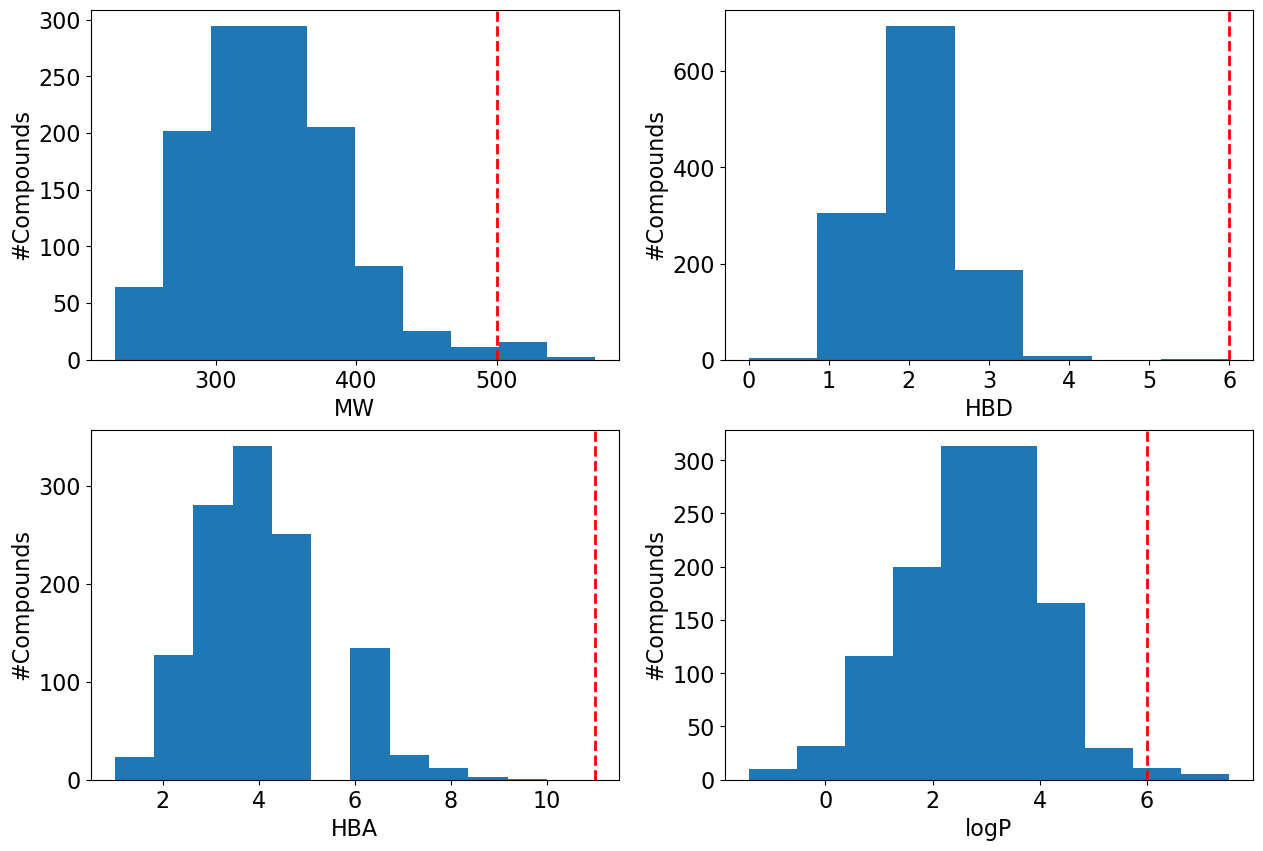

In [ ]:
# plot Ro5 properties on reduced data
#plt.figure(figsize=(50, 6))
plt.rc('font', size=16) 
fig, axis = plt.subplots(2, 2)
fig.set_size_inches(13, 10)
descriptors = ['MW', 'HBD', 'HBA', 'logP']
_temp = ['g/mol', '', '', '', '', 'Å']
benchmarks = [500, 6, 11, 6]
labels = [500, 5, 10, 5]
for i, descriptor_name in enumerate(descriptors):
        if descriptor_name == 'HBD':
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name], bins=7)
        elif  descriptor_name == 'HBA': 
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name], bins=11)
        elif  descriptor_name == 'RB': 
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name], bins=12)
        else:
                axis[i // 2, i % 2].hist(data_post_filtered[descriptor_name])
        axis[i // 2, i % 2].set(ylabel="#Compounds", xlabel=descriptor_name)
        line = axis[i // 2, i % 2].axvline(benchmarks[i], color='r', linestyle='dashed', linewidth=2, label = f"{labels[i]}{_temp[i]}")

In [ ]:
print(f'{sum(data_post_filtered["logP"] > 5)} compounds with logP > 5')
print(f'{sum(data_post_filtered["MW"] > 500)} compounds with MW > 500')
print(f'{sum(data_post_filtered["RB"] > 5)} compounds with RB > 5')
print(f'{sum(data_post_filtered["HBD"] > 5)} compounds with HBD > 5')
print(f'{sum(data_post_filtered["HBA"] > 10)} compounds with HBA > 10')
print(f'{sum(data_post_filtered["TPSA"] > 140)} compounds with TPSA > 140')

37 compounds with logP > 5
20 compounds with MW > 500
64 compounds with RB > 5
1 compounds with HBD > 5
0 compounds with HBA > 10
0 compounds with TPSA > 140


In [ ]:
# compounds fullfilling Ro5
print(f'{sum(data_post_filtered["Ro5"])} compounds fulfill Ro5')
print(f'{sum(data_post_filtered["Veber"])} compounds fulfill Vebers rule')
print(f'{sum(data_post_filtered[data_post_filtered["Veber"]]["Ro5"])} compounds fulfill Vebers rule & Ro5')

1154 compounds fulfill Ro5
1095 compounds fulfill Vebers rule
1095 compounds fulfill Vebers rule & Ro5


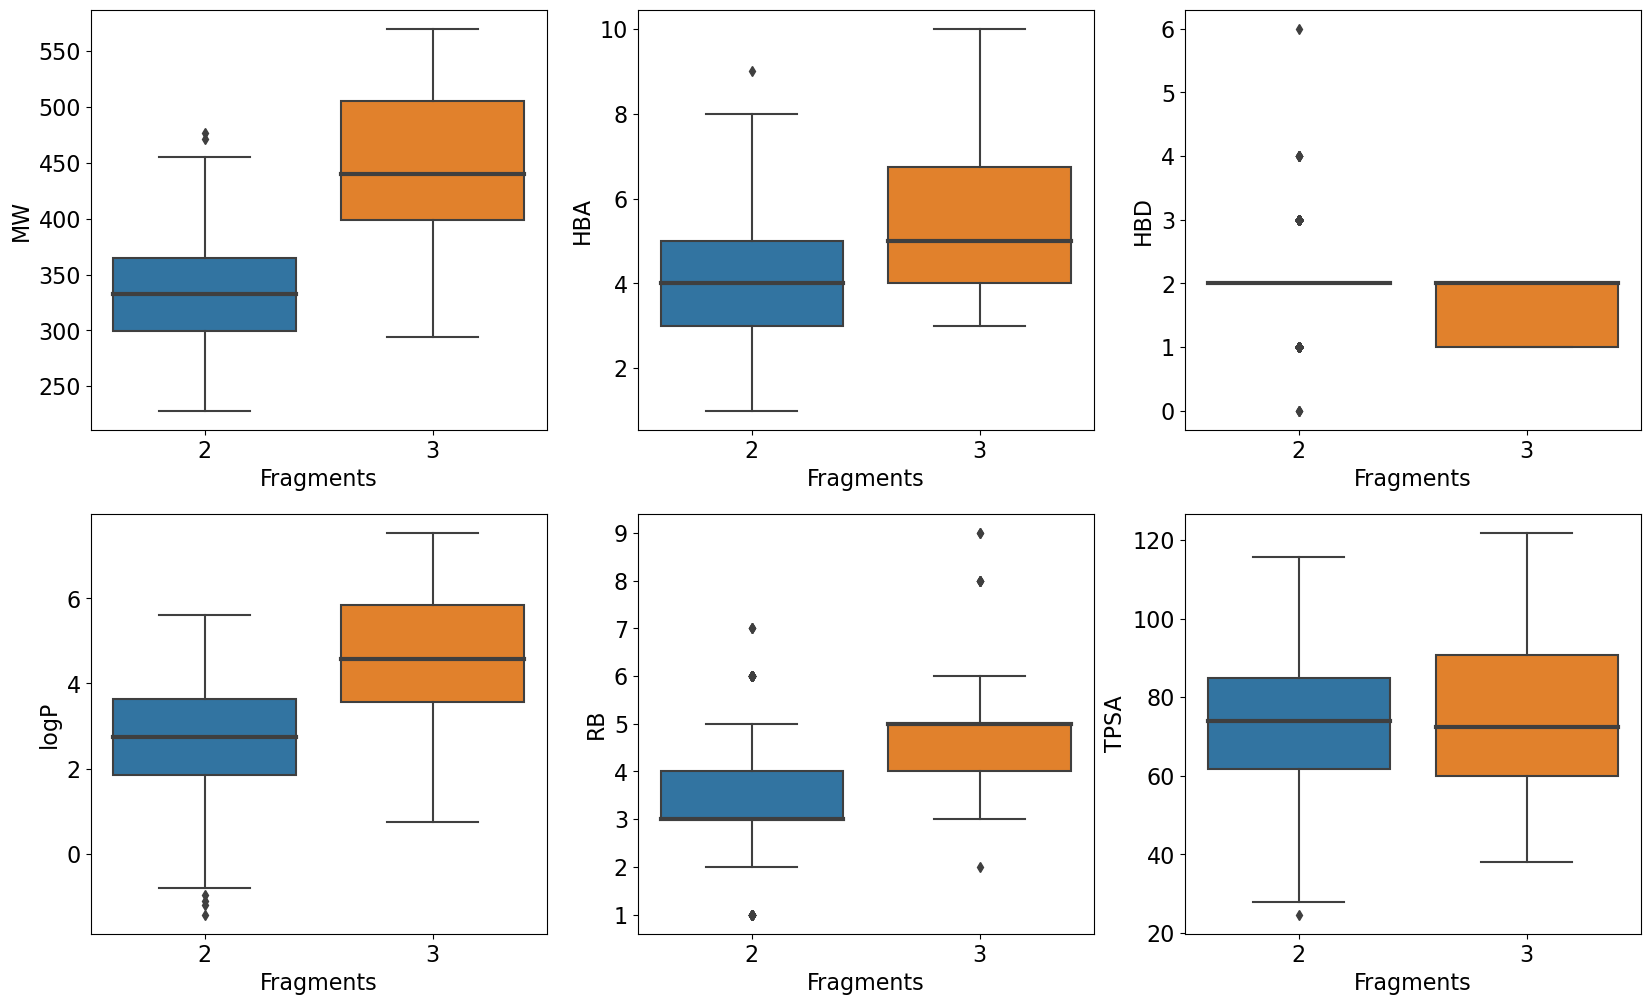

In [ ]:
plt.figure(figsize=(20, 12))
descriptors = ['MW', 'HBA', 'HBD', 'logP', 'RB', 'TPSA']
for i, descriptor_name in enumerate(descriptors):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(
        x="num_fragments",
        y=descriptor_name,
        data=data_post_filtered,
        medianprops={"linewidth": 2, "linestyle": "-"},
        )
        plt.ylabel(descriptor_name, fontsize=16)
        plt.xlabel("Fragments", fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

In [ ]:
for descriptor_name in range(2, 5):
    x = data_post_filtered[data_post_filtered.num_fragments == descriptor_name].logP
    print(f'logP median of compounds with {descriptor_name} fragments:\n{x.mean()}')

logP median of compounds with 2 fragments:
2.6898096472663156
logP median of compounds with 3 fragments:
4.654934516129035
logP median of compounds with 4 fragments:
nan


Text(0.5, 0, 'QED')

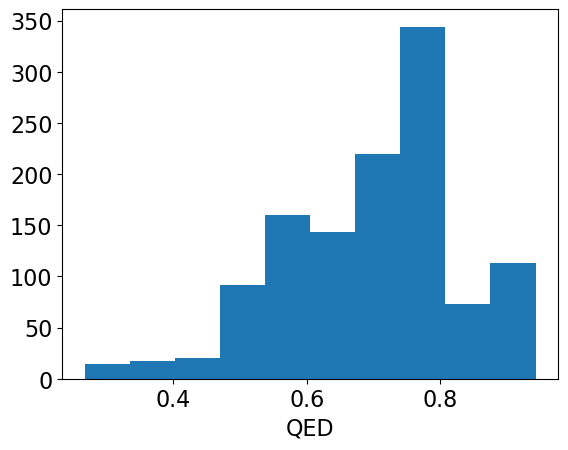

In [ ]:
# plot QED
plt.hist(data_post_filtered['QED'])
plt.xlabel('QED')

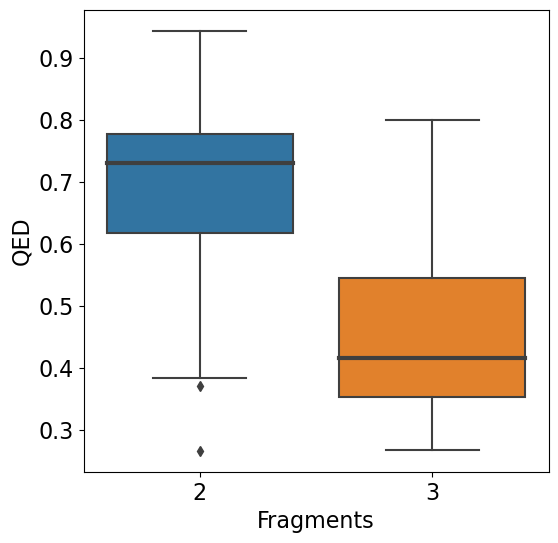

In [ ]:
plt.figure(figsize=(6, 6))

descriptors = ['QED']
for i, descriptor_name in enumerate(descriptors):
        plt.subplot(1, 1, i + 1)
        sns.boxplot(
        x="num_fragments",
        y=descriptor_name,
        data=data_post_filtered,
        medianprops={"linewidth": 2, "linestyle": "-"},
        )
        plt.ylabel(descriptor_name, fontsize=16)
        plt.xlabel("Fragments", fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)

Top 25 ranked compounds


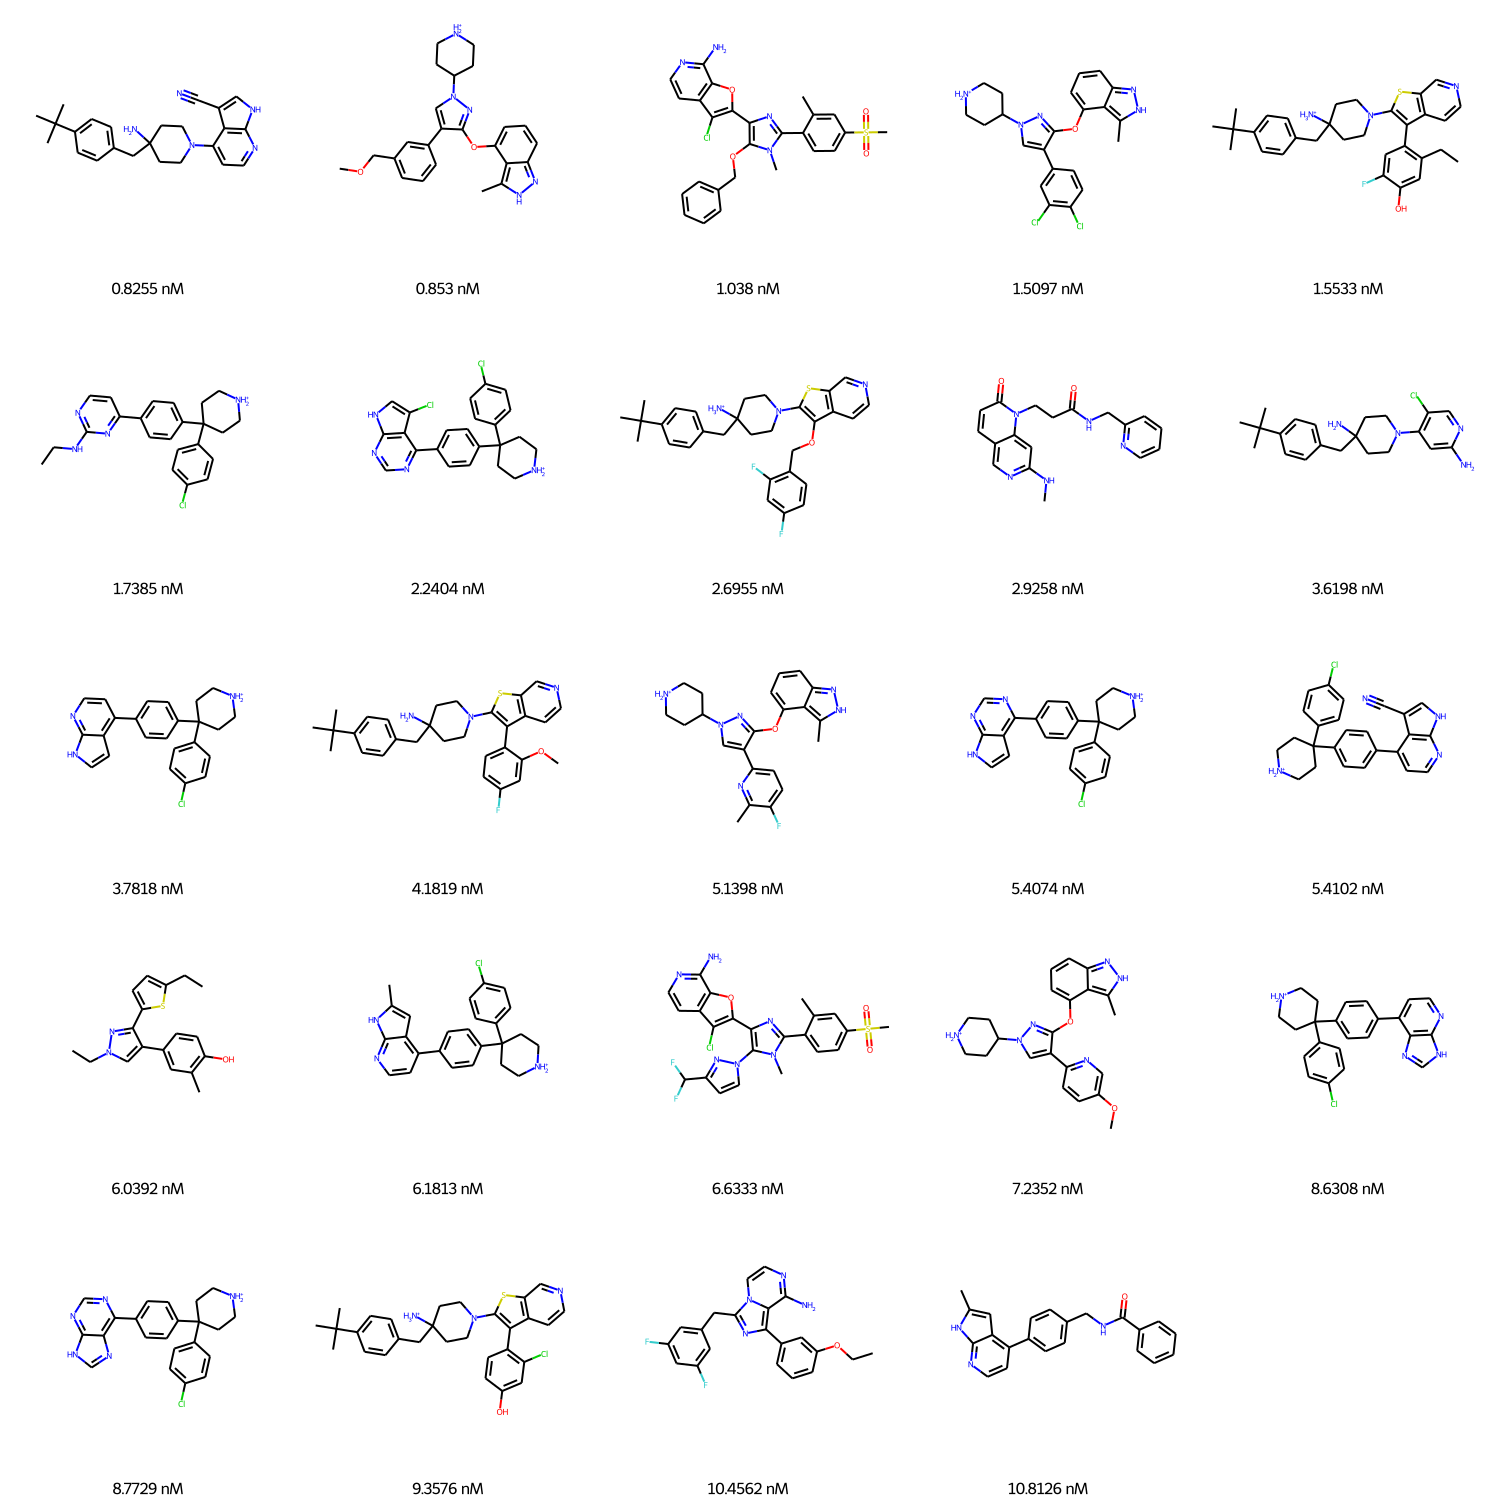

In [ ]:
print("Top 25 ranked compounds")
mols = [data_post_filtered.ROMol[idx] for idx in range(25) if data_post_filtered.has_no_chiral_centre[idx]]
for mol in mols:
    AllChem.Compute2DCoords(mol)
img = Draw.MolsToGridImage(
    mols, 
    legends=[
        f"{round(data_post_filtered['binding_affinity'][idx],4)} nM"  
        for idx in range(50)
    ],  
    molsPerRow=5, 
    maxMols=100,
    subImgSize=(200, 200)
)
img

In [ ]:
ro5fulfilled = data_post_filtered[data_post_filtered.Ro5].reset_index(drop=True)
ro5_veber_fulfilled = data_post_filtered[data_post_filtered.Veber].reset_index(drop=True)


Top 25 ranked compounds (fulfilling Ro5 and Vebers rule)


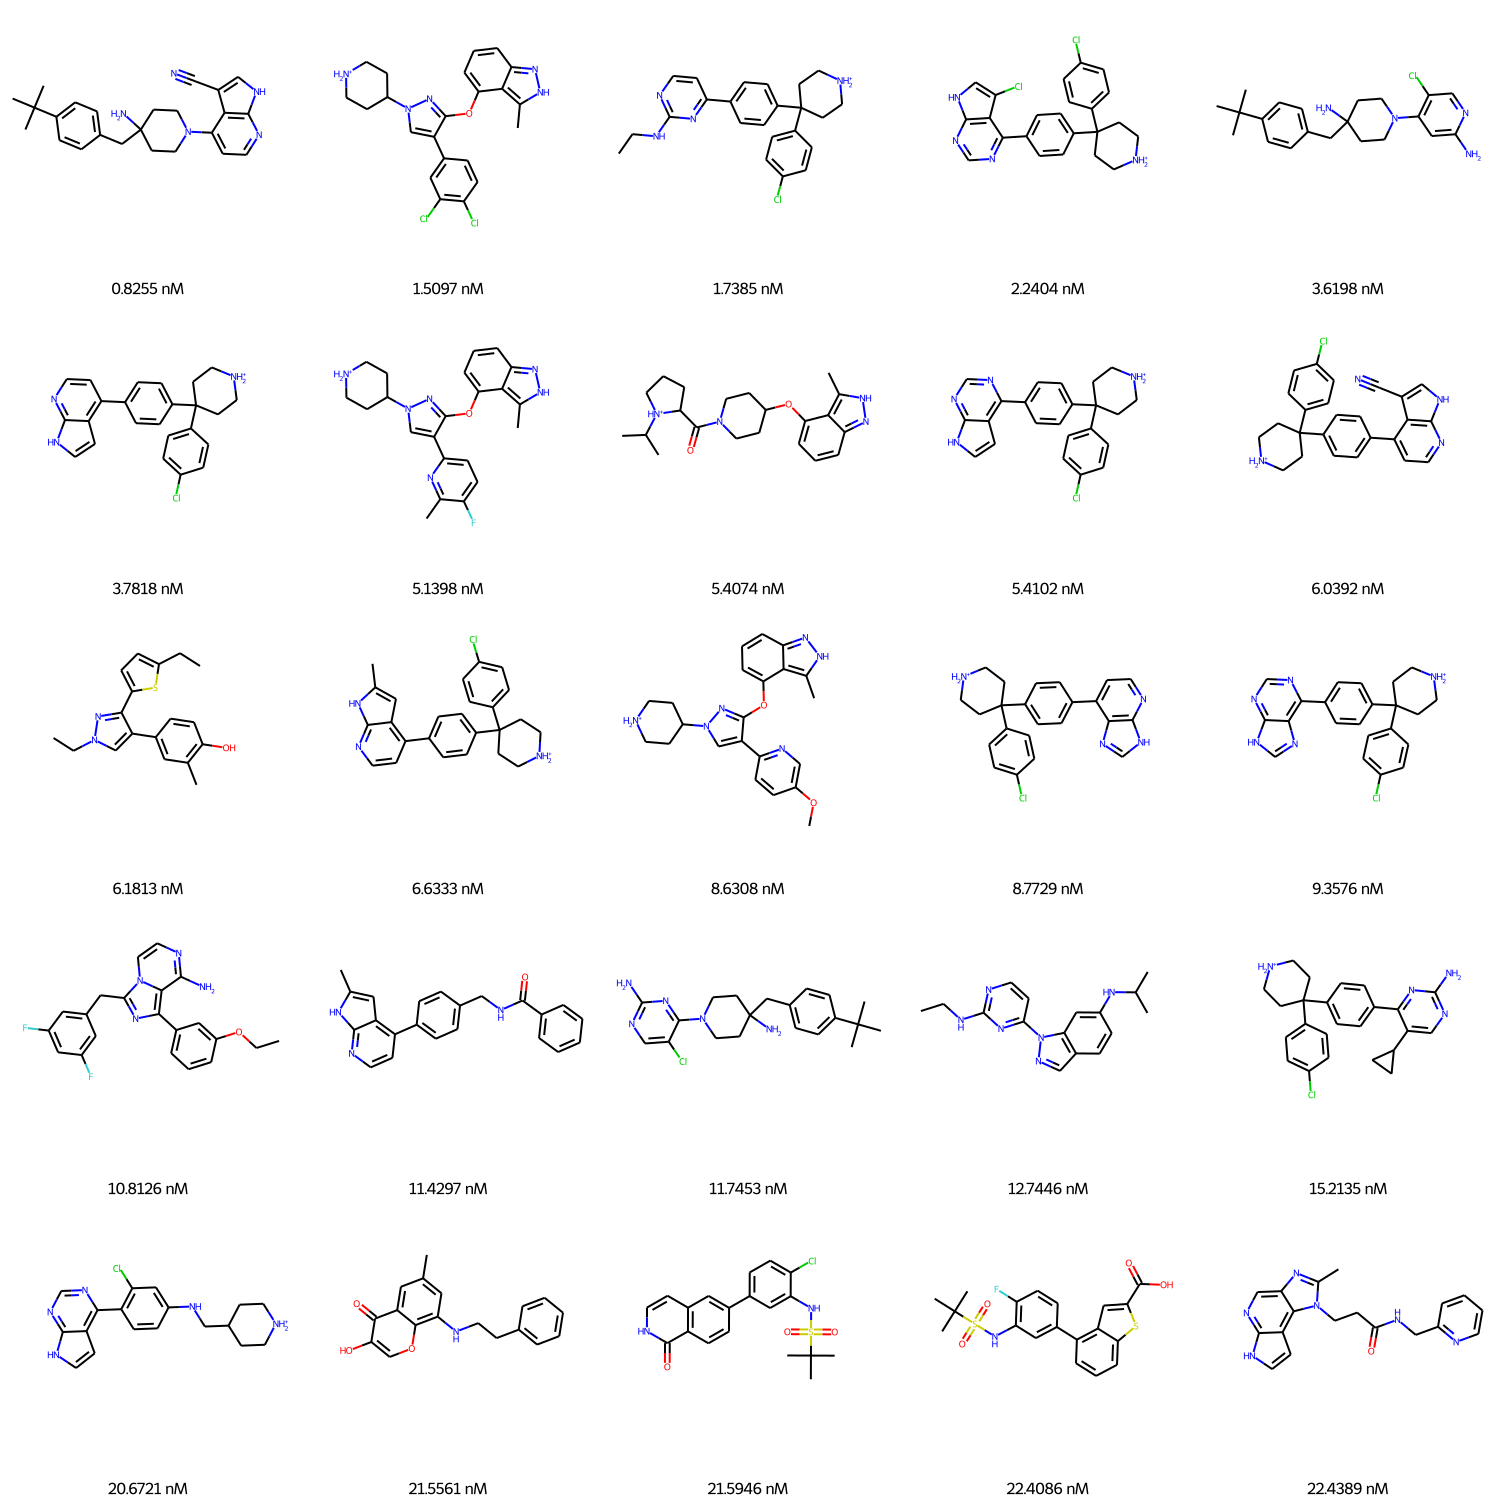

In [ ]:
print("Top 25 ranked compounds (fulfilling Ro5 and Vebers rule)")
mols = [ro5_veber_fulfilled.ROMol[idx] for idx in range(25)]
for mol in mols:
    AllChem.Compute2DCoords(mol)
img = Draw.MolsToGridImage(
    mols,  
    molsPerRow=5, 
    legends=[f"{round(ro5_veber_fulfilled['binding_affinity'][idx],4)} nM" for idx in range(25)],
    maxMols=100,
    subImgSize=(200, 200)
)
img